In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

## Passenger Waiting Data

In [2]:
passenger_waittime = pd.read_csv("../../clean_data/passenger_waittimes.csv")

In [3]:
passenger_waittime.tail()

,dt,CalendarYear,Day,Time,Avg Total Time,Max Total Time,Max # of PAX in Line
29994,2017-09-20 00:35:00,2017,2017-09-20,00:35:00,2,2,4
29995,2017-09-20 00:40:00,2017,2017-09-20,00:40:00,2,2,4
29996,2017-09-20 00:45:00,2017,2017-09-20,00:45:00,1,1,2
29997,2017-09-20 00:50:00,2017,2017-09-20,00:50:00,1,3,5
29998,2017-09-20 00:55:00,2017,2017-09-20,00:55:00,1,2,3


In [4]:
from datetime import datetime as dt

In [5]:
passenger_waittime['Time'] = pd.DatetimeIndex(passenger_waittime.dt)

In [6]:
passenger_waittime['hour']= passenger_waittime.Time.apply(lambda x: x.hour)

In [7]:
passenger_waittime['month']= passenger_waittime.Time.apply(lambda x: x.month)

In [8]:
passenger_waittime['dayofweek']= passenger_waittime.Time.apply(lambda x: x.dayofweek)

In [9]:
passenger_waittime.rename(columns={"Avg Total Time": "avg_total_time", "Max Total Time":"max_total_time", 
                                   "Max # of PAX in Line": "num_passengers_waiting_in_line"}, inplace=True)

In [10]:
passenger_waittime.head()

,dt,CalendarYear,Day,Time,avg_total_time,max_total_time,num_passengers_waiting_in_line,hour,month,dayofweek
0,2017-06-07 16:05:00,2017,2017-06-07,2017-06-07 16:05:00,0,0,0,16,6,2
1,2017-06-07 16:10:00,2017,2017-06-07,2017-06-07 16:10:00,0,0,0,16,6,2
2,2017-06-07 16:15:00,2017,2017-06-07,2017-06-07 16:15:00,0,0,0,16,6,2
3,2017-06-07 16:20:00,2017,2017-06-07,2017-06-07 16:20:00,0,0,0,16,6,2
4,2017-06-07 16:25:00,2017,2017-06-07,2017-06-07 16:25:00,0,0,0,16,6,2


### Hourly

In [11]:
avg_waittime = passenger_waittime.groupby(['hour']).avg_total_time.mean()

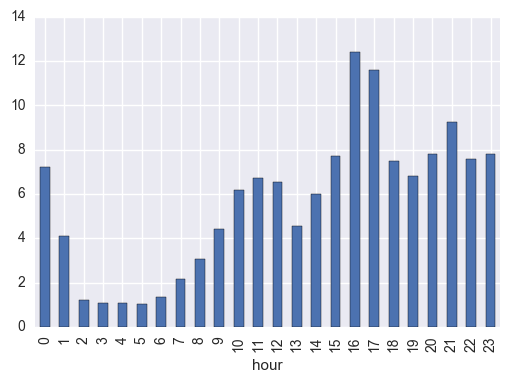

In [12]:
avg_waittime.plot(kind="bar")

In [13]:
num_passengers_waiting = passenger_waittime.groupby(['hour']).num_passengers_waiting_in_line.mean()

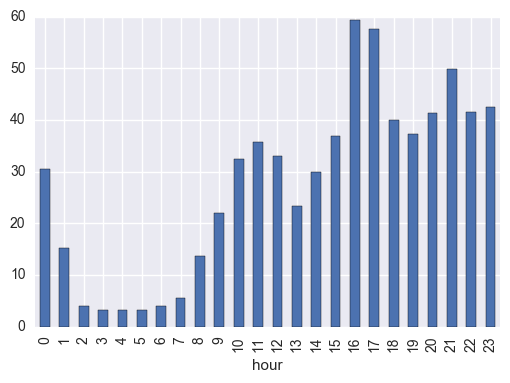

In [14]:
num_passengers_waiting.plot(kind="bar")

### Monthly

In [15]:
avg_waittime_month = passenger_waittime.groupby(['month']).avg_total_time.mean()

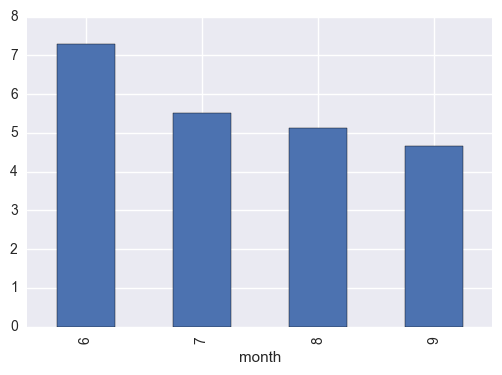

In [16]:
avg_waittime_month.plot(kind="bar")

In [17]:
num_passengers_waiting_monthly = passenger_waittime.groupby(['month']).num_passengers_waiting_in_line.mean()

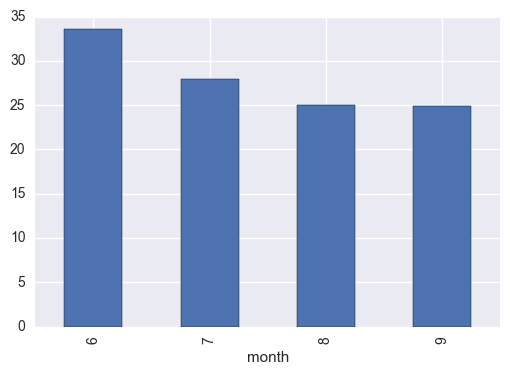

In [18]:
num_passengers_waiting_monthly.plot(kind="bar")

### Day of Week

In [19]:
avg_waittime_week = passenger_waittime.groupby(['dayofweek']).avg_total_time.mean()

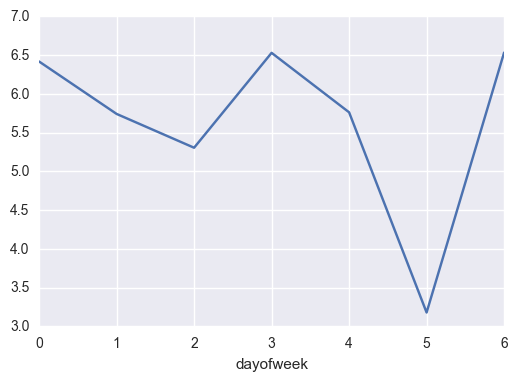

In [20]:
avg_waittime_week.plot(kind="line")

In [21]:
max_waittime_week = passenger_waittime.groupby(['dayofweek']).max_total_time.mean()

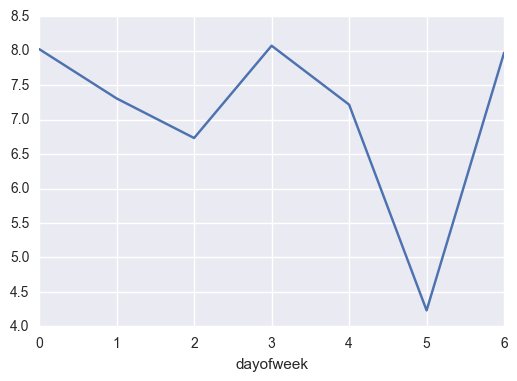

In [22]:
max_waittime_week.plot(kind="line")

In [23]:
num_passengers_waiting_week = passenger_waittime.groupby(['dayofweek']).num_passengers_waiting_in_line.mean()

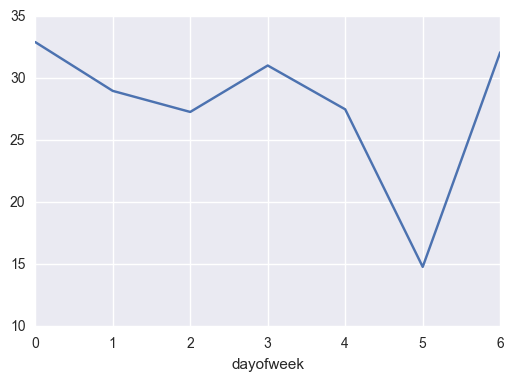

In [24]:
num_passengers_waiting_week.plot(kind="line")

## Taxi Lot Data

In [25]:
lot_data = pd.read_csv("../../clean_data/hourly_lot_status.csv")
lot_data.head()

,dt,P7_num,P7_percent,DH_num,DH_percent,Term_A_num,Term_A_percent,Total_percent,MAT,Term_B_Pax_waittime,Term_C_Pax_waittime,Term_D_Pax_waittime
0,2017-09-01 06:00:00,27.0,0.10,122.50,0.70,2.50,0.10,0.300000,0,5,0,0
1,2017-09-01 07:00:00,202.5,0.75,175.00,1.00,3.75,0.15,0.633333,0,5,1,0
2,2017-09-01 08:00:00,67.5,0.25,175.00,1.00,5.00,0.20,0.483333,0,5,2,0
3,2017-09-01 09:00:00,27.0,0.10,140.00,0.80,10.00,0.40,0.433333,0,5,2,0
4,2017-09-01 10:00:00,27.0,0.10,61.25,0.35,1.25,0.05,0.166667,0,10,2,0


In [26]:
lot_data['Time'] = pd.DatetimeIndex(lot_data.dt)

In [27]:
lot_data['hour']= lot_data.Time.apply(lambda x: x.hour)
lot_data['month']= lot_data.Time.apply(lambda x: x.month)
lot_data['dayofweek']= lot_data.Time.apply(lambda x: x.dayofweek)
lot_data['num_taxis_waiting'] = lot_data.P7_num + lot_data.DH_num + lot_data.Term_A_num 
lot_data['passenger_waittimes'] = lot_data.Term_B_Pax_waittime+lot_data.Term_C_Pax_waittime+lot_data.Term_D_Pax_waittime

In [28]:
lot_data.head()

,dt,P7_num,P7_percent,DH_num,DH_percent,Term_A_num,Term_A_percent,Total_percent,MAT,Term_B_Pax_waittime,Term_C_Pax_waittime,Term_D_Pax_waittime,Time,hour,month,dayofweek,num_taxis_waiting,passenger_waittimes
0,2017-09-01 06:00:00,27.0,0.10,122.50,0.70,2.50,0.10,0.300000,0,5,0,0,2017-09-01 06:00:00,6,9,4,152.00,5
1,2017-09-01 07:00:00,202.5,0.75,175.00,1.00,3.75,0.15,0.633333,0,5,1,0,2017-09-01 07:00:00,7,9,4,381.25,6
2,2017-09-01 08:00:00,67.5,0.25,175.00,1.00,5.00,0.20,0.483333,0,5,2,0,2017-09-01 08:00:00,8,9,4,247.50,7
3,2017-09-01 09:00:00,27.0,0.10,140.00,0.80,10.00,0.40,0.433333,0,5,2,0,2017-09-01 09:00:00,9,9,4,177.00,7
4,2017-09-01 10:00:00,27.0,0.10,61.25,0.35,1.25,0.05,0.166667,0,10,2,0,2017-09-01 10:00:00,10,9,4,89.50,12


In [29]:
agg_nums = lot_data.groupby(['hour']).mean()

In [30]:
agg_nums.head()

,P7_num,P7_percent,DH_num,DH_percent,Term_A_num,Term_A_percent,Total_percent,MAT,Term_B_Pax_waittime,Term_C_Pax_waittime,Term_D_Pax_waittime,month,dayofweek,num_taxis_waiting,passenger_waittimes
hour,,,,,,,,,,,,,,,
0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.0,5.0,2.0,0.0,9.8625,3.075,0.00,7.0
6,27.0,0.10,122.5,0.7,2.50,0.10,0.300000,0.0,5.0,0.0,0.0,9.8625,3.075,152.00,5.0
7,202.5,0.75,175.0,1.0,3.75,0.15,0.633333,0.0,5.0,1.0,0.0,9.8625,3.075,381.25,6.0
8,67.5,0.25,175.0,1.0,5.00,0.20,0.483333,0.0,5.0,2.0,0.0,9.8625,3.075,247.50,7.0
9,27.0,0.10,140.0,0.8,10.00,0.40,0.433333,0.0,5.0,2.0,0.0,9.8625,3.075,177.00,7.0


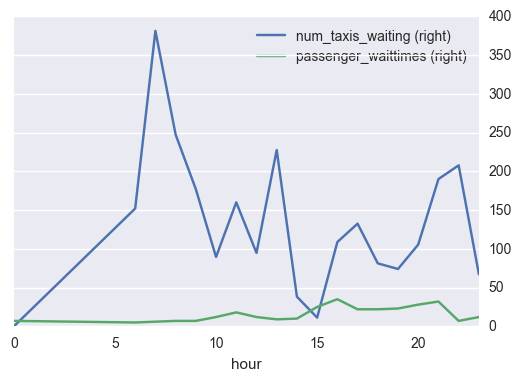

In [31]:
# count_df[["Normal Days", "Federal Holidays"]].plot(kind="line")
agg_nums[["num_taxis_waiting", "passenger_waittimes"]].plot(kind="line", secondary_y=True)

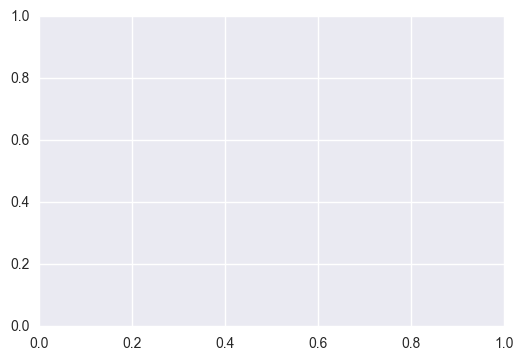

In [40]:
fig, ax = plt.subplots()

In [41]:
agg_nums.num_taxis_waiting.plot(ax=ax, style='b-')

In [42]:
agg_nums.passenger_waittimes.plot(ax=ax, style='r-', secondary_y=True)

In [45]:
plt.show()


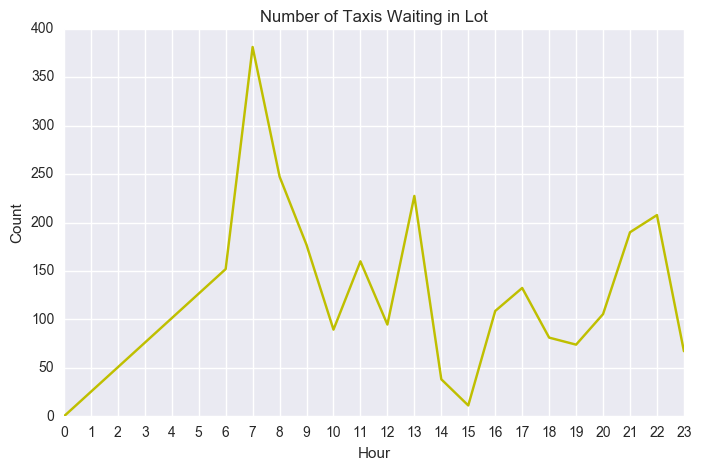

In [65]:
fig, ax1 = plt.subplots(figsize=(8, 5))
agg_nums['num_taxis_waiting'].plot(kind='line', color='y', title = 'Number of Taxis Waiting in Lot')
# plt.title("Number of Taxis Waiting in Lot")
plt.xticks(range(0,24))
plt.xlabel("Hour")
plt.ylabel("Count")

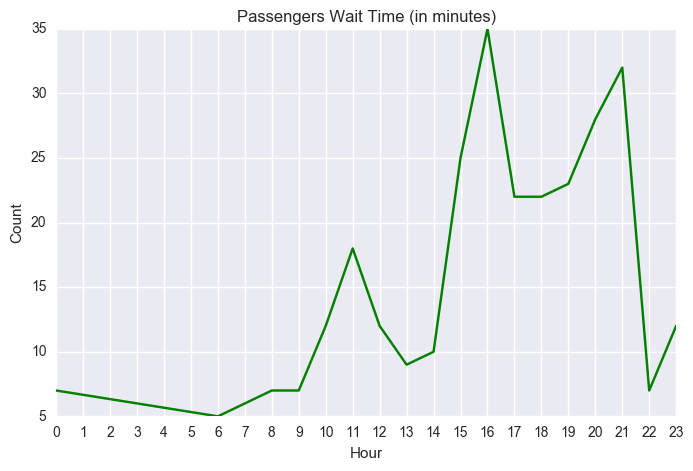

In [66]:
fig, ax1 = plt.subplots(figsize=(8, 5))
agg_nums['passenger_waittimes'].plot(kind='line', color='g', title = 'Passengers Wait Time (in minutes)')
plt.xticks(range(0,24))
plt.xlabel("Hour")
plt.ylabel("Count")

In [ ]:
agg_nums["Taxis_in_Lot"]=(agg_nums["num_taxis_waiting"]-agg_nums["num_taxis_waiting"].mean())/agg_nums["num_taxis_waiting"].std()

In [ ]:
agg_nums["Passengers_Wait_Times"]=(agg_nums["passenger_waittimes"]-agg_nums["passenger_waittimes"].mean())/agg_nums["passenger_waittimes"].std()

In [ ]:
agg_nums.head()

In [ ]:
# count_df[["Normal Days", "Federal Holidays"]].plot(kind="line")
agg_nums[["Taxis_in_Lot", "Passengers_Wait_Times"]].plot(xticks=range(0,24), figsize=(8,5), kind="line", title = "Comparing Taxis in Lot with Passenger Wait Times (Scaled to z-score)", secondary_y=True)